# Imports and setting up viz

NB : conda lam1env (Python3.12)

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_hf import *
from tools_native import *
from tools_LIAISE import *

# sys.path.append('../../python_tools/aborella/PLOTS/')
# from datasets import *
sys.path.append('../../python_tools/aborella/UTIL/')
import xr_utils

In [6]:
psy.rcParams['auto_show'] = True
mpl.rcParams['figure.figsize'] = [10., 8.]

# Load model files and edit datasets

In [7]:
mesoNH_dir = '../../../mesoNH_simulations'

In [28]:
filename='{}/LIAIS.1.LE_ISBA.nc'.format(mesoNH_dir)
ds = xr.open_dataset(filename)
ds.attrs['name']= 'ISBA_fluxlat'

rename_dict={
    # 'time':'start_time',
    'longitude':'lon',
    'latitude':'lat'
}
ds = ds.rename(rename_dict)

ds['LE_ISBA'].attrs['units'] = 'W m⁻²'
ds

<xarray.Dataset>
Dimensions:  (record: 408, nj: 164, ni: 290, time: 1)
Coordinates:
  * ni       (ni) float64 0.0 2e+03 4e+03 6e+03 ... 5.74e+05 5.76e+05 5.78e+05
  * nj       (nj) float64 0.0 2e+03 4e+03 6e+03 ... 3.22e+05 3.24e+05 3.26e+05
    lat      (nj, ni) float64 ...
    lon      (nj, ni) float64 ...
  * time     (time) datetime64[ns] 2021-07-14T01:00:00
Dimensions without coordinates: record
Data variables:
    LE_ISBA  (record, nj, ni) float64 ...
Attributes:
    MNH_cleanly_closed:  yes
    history:             Fri Feb  2 11:07:35 2024: ncecat -v LE_ISBA,time,lat...
    NCO:                 netCDF Operators version 5.0.6 (Homepage = http://nc...
    name:                ISBA_fluxlat

# Maps

KeyError: 'SWD'

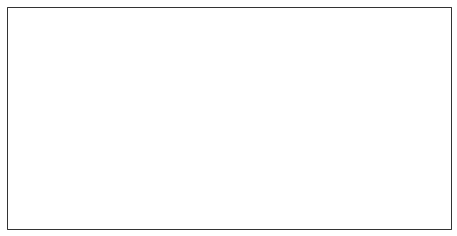

In [29]:
#Display map of var for ds
var='SWD'
ds=ds
color_map=emb

vmin=-140
vmax= 140
# vmin=None
vmin,vmax=None, None
# cbar_label='Altitude (m)'
cbar_label=None
title=None
poly=None

# map_plotvar(ds[var])
map_ave(ds, var, cmap=color_map, figsize=(8,4), title=title, vmin=vmin, vmax=vmax, clabel=cbar_label, poly=poly)

# Time series

ValueError: Dimensions {'time'} do not exist. Expected one or more of Frozen({'ni': 290, 'nj': 164, 'record': 408})

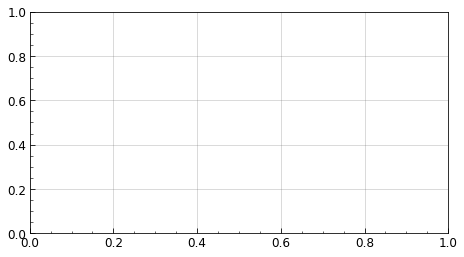

In [30]:
var='LE_ISBA'

ds_list=[ds]

time_series_ave(ds_list, var, ds_colors=False, title='{} {}'.format(var, ds[var].attrs['units']))
# seasonal_cycle_ave(ds_list, var, ds_colors=True, year_min=year_min, year_max=year_max, ylabel=ylabel, title=title, figsize=figsize)